In [1]:
import os # Operating System
import cv2 # OpenCV --> library for image manipulation like change color to black and white, crop, etc
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # Library untuk animasi loading

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

loading data from kaggle

In [5]:
!mkdir -p ~/ .kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d jonathanimmanuel/barcode-and-qr

 99% 227M/228M [00:13<00:00, 21.6MB/s]
100% 228M/228M [00:13<00:00, 17.7MB/s]


Unzipping the data

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/barcode-and-qr.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

X-ray of a covid patient

(256, 256, 3)


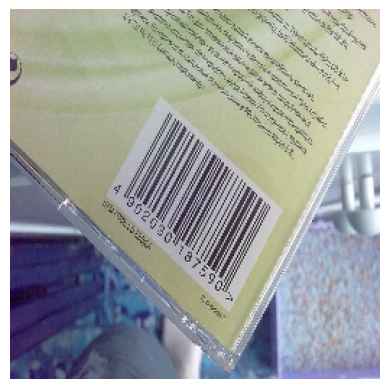

In [9]:
# Image of Barcode
img=cv2.imread("/content/dataset/barcode/05102009081.jpg")
img=cv2.resize(img,[256,256])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

(256, 256, 3)


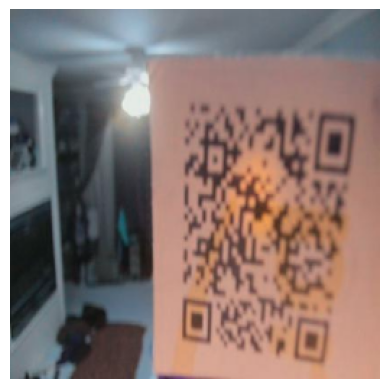

In [10]:
#Image og QR
# Image of Barcode
img=cv2.imread("/content/dataset/qr/blurredimage001_jpg.rf.81a91b1fd9f2cb7d7f4a7ca28b55ce4d.jpg")
img=cv2.resize(img,[256,256])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

Read data and converting into array

In [11]:
# Data
barcode_ds=os.listdir("/content/dataset/barcode")
qr_ds=os.listdir("/content/dataset/qr")

In [12]:
x=list()
y=list()
for i in  barcode_ds:
    img=cv2.imread("/content/dataset/barcode/"+i)
    img=cv2.resize(img,[256,256])
    x.append(img)
    y.append(0)
print("completed")
for i in qr_ds:
    img=cv2.imread("/content/dataset/qr/"+i)
    img=cv2.resize(img,[256,256])
    x.append(img)
    y.append(1)
print("completed")

x=np.array(x)
y=np.array(y)

completed
completed


Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.2)

Creating CNN Model

In [14]:
model = Sequential()

In [15]:
#first
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and relu activation
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))


model.add(Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [17]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
callback=EarlyStopping(
    monitor="accuracy",
    min_delta=0.01,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=1

)

In [23]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),callbacks=callback)

Epoch 1/10
25/25 [==============================] - 2s 68ms/step - loss: 2.2727e-05 - accuracy: 1.0000 - val_loss: 0.4211 - val_accuracy: 0.9548
Epoch 2/10
25/25 [==============================] - 1s 59ms/step - loss: 1.8853e-05 - accuracy: 1.0000 - val_loss: 0.4162 - val_accuracy: 0.9548
Epoch 2: early stopping


I got train accuracy = 1 and validation accuracy = 0.95 only in 2 epochs.
Difference between both accuracy is 0.05 * 100 = 5%

In [26]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 22ms/step - loss: 0.4019 - accuracy: 0.9548


[0.4018513262271881, 0.9547738432884216]

Prediction
For prediction I downloaded a barcode image.
My model predicted correctly.

Shape of Image:  (256, 256, 3)


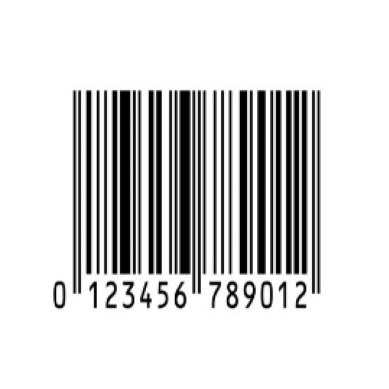

1/1 [==============================] - 0s 246ms/step
Barcode


In [28]:
img=cv2.imread("/content/downloaded_barcode_image.jpg")
img=cv2.resize(img,[256,256])
predict_1=img.reshape(1,256,256,3)
print("Shape of Image: ",img.shape)
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.show()
array_output=model.predict(predict_1)
result=array_output.argmax()
if(result==0):
  print("Barcode")
else:
  print("QR")
